In [1]:
import argparse
from sc2ai.spinup.algorithms.ppo.ppo import ppo
from sc2ai.spinup.algorithms.ppo.sc2_nets import SC2AtariNetActorCritic
from sc2ai.spinup.utils.mpi_tools import mpi_fork
from sc2ai.envs import make_sc2env
from absl import flags
import torch

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
import sys
sys.argv = ['--seed 0']
flags.FLAGS.mark_as_parsed()



parser = argparse.ArgumentParser()
parser.add_argument('--map-name', type=str, default='FleeRoachesv4_training')
parser.add_argument('--seed', '-s', type=int, default=0)
#parser.add_argument('--cpu', type=int, default=1)
#parser.add_argument('--steps', type=int, default=6000)
#parser.add_argument('--epochs', type=int, default=1000000)
parser.add_argument('--cpu', type=int, default=1)
parser.add_argument('--steps', type=int, default=1000)
parser.add_argument('--epochs', type=int, default=10000)
parser.add_argument('--exp_name', type=str, default='ppognn_sc2')
args = parser.parse_args()

mpi_fork(args.cpu)  # run parallel code with mpi

from sc2ai.spinup.utils.run_utils import setup_logger_kwargs
logger_kwargs = setup_logger_kwargs(args.exp_name, args.seed, data_dir = '/users/mli115/scratch/pposc', datestamp=True)

if torch.cuda.is_available():
    dev = "cuda:0"
else:
    dev = "cpu"
device = torch.device(dev)
print("device - ", dev, device)


device -  cuda:0 cuda:0


In [3]:
env = make_sc2env(map=args.map_name)

In [4]:
env.__dict__

{'_num_players': 1,
 '_map_name': 'FleeRoachesv4_training',
 '_env_options': SC2EnvOptions(map='FleeRoachesv4_training', render=False, feature_screen_size=32, feature_minimap_size=32, rgb_screen_size=None, rgb_minimap_size=None, action_space='features', use_feature_units=True, use_raw_units=True, disable_fog=True, max_agent_steps=0, game_steps_per_episode=None, max_episodes=0, step_mul=8, agent1_name='TrainedAI', agent1_race='terran', agent2_name='DefaultAI', agent2_race='terran', difficulty=<Difficulty.very_easy: 1>, profile=False, trace=False, parallel=1, save_replay=True, realtime=False),
 '_sc2_env': None,
 '_seed': None,
 '_observation_spec': None,
 '_action_set': <sc2ai.envs.actions.DefaultActionSet at 0x7f8fe99a5190>,
 '_action_gym_space': None,
 '_observation_gym_space': None,
 '_observation_set': <sc2ai.envs.observations.ObservationSet at 0x7f8fe99a54d0>,
 '_reward_processor': <sc2ai.envs.rewards.RewardProcessor at 0x7f8ed3079910>,
 '_current_raw_obs': None,
 '_current_obs': N

In [5]:
env.reset()

/gpfs_home/mli115/torch-env/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/gpfs/home/mli115/pysc2/pysc2/env/sc2_env.py:526: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for f, o in zip(self._features, self._obs)]


{'feature_screen': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.

In [6]:
import numpy as np
np.where(env.step([env.sample_action()])[0]['feature_screen'][3] != 0)

(array([11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13]),
 array([10, 15, 16, 17, 21,  9, 10, 11, 15, 16, 17, 20, 21, 22, 15, 16, 17]))

In [220]:
env.step([env.sample_action()])[1]

0

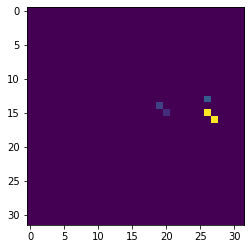

In [188]:
import matplotlib.pyplot as plt

img = env.step([env.sample_action()])[0]['feature_screen'][3]
plt.imshow(img*225)
